## Supervised Learning Project

A machine learning project using Python. This project is a supervised learning, classification problem with multiple classes.  In this project, we will compare and contrast the performance of three different learning models on a common and publicly available dataset.

This project depends on the following libraries.  Make sure you have them installed.

* scipy
* numpy
* matplotlib
* pandas
* scikit-learn

lets' run the following code cell:

In [1]:
from sklearn.model_selection import train_test_split

In [15]:
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Import libraries

Import all of the modules, functions, and objects we will use in our model

In [2]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

##  Load the Dataset

We will be using the iris flowers dataset, which contains 150 observations of iris flowers. There are four columns of measurements and the species of flower observed.  Only three species are present in this dataset.

The data can be loaded directly from the UCI Machine Learning Repository

In [8]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

##  Dataset Properties

Lets take a look at the dataset by observing its dimensions, the first few rows of data, a statistical summary of the attributes, and a breakdown of the data by the class variable.

In [9]:
# Shape
print(dataset.shape)

(150, 5)


In [10]:
# Head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [11]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Data Visualizations

Lets visualize the data so we can understand the distribution of the input attributes. We will use histograms of each attribute, as well as some multivariate plots so that we can view the interactions between variables.

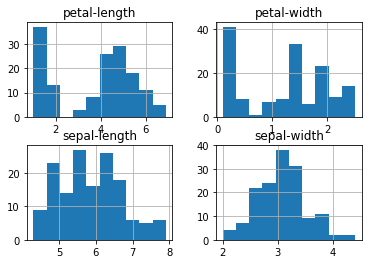

In [8]:
# histograms
dataset.hist()
plt.show()

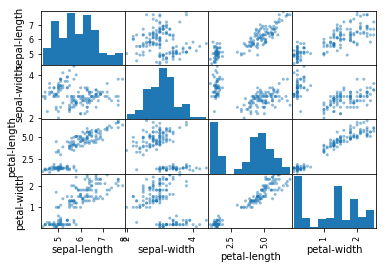

In [9]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

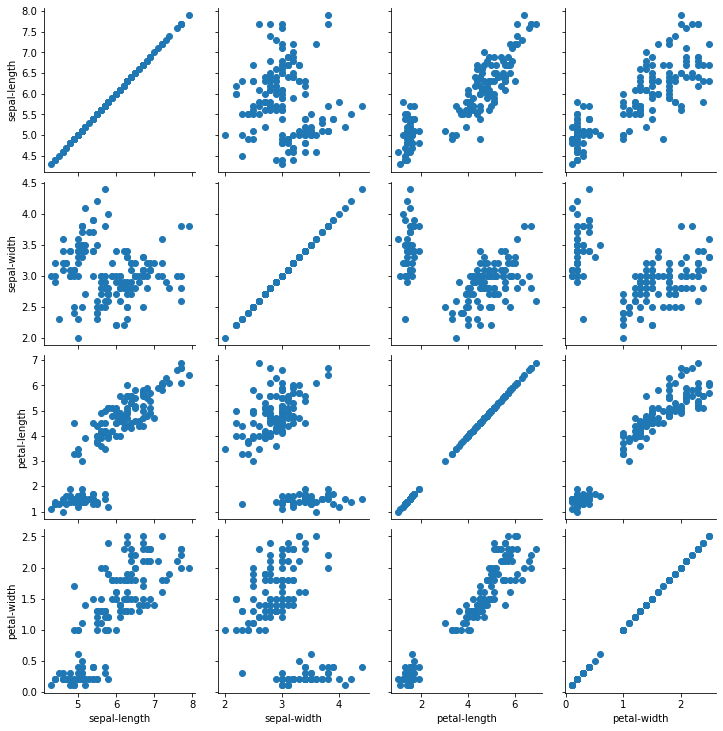

In [17]:
g = sns.PairGrid(dataset)
g.map(plt.scatter);

<Figure size 3600x3600 with 0 Axes>

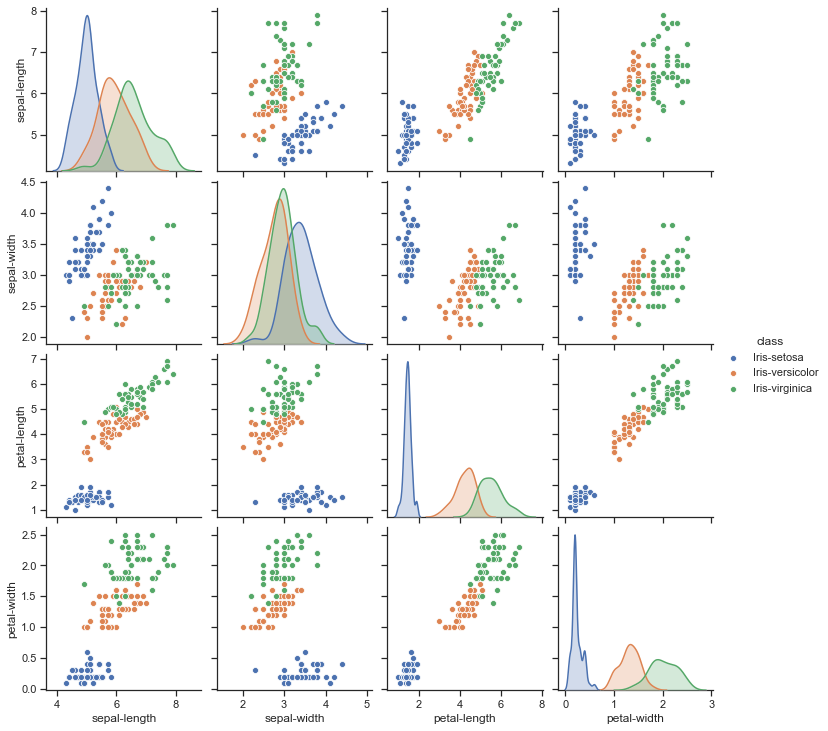

In [25]:
plt.figure(figsize = (50,50))
sns.pairplot(dataset, hue="class")

## Evaluate Algorithms

Lets create some models of the data and estimate their accuracy on unseen data.

We are going to,

* Create a validation dataset
* Set-up cross validation
* Build three different models to predict species from flower measurement
* Select the best model

##  Create Validation Dataset

Lets split the loaded dataset into two.  80% of the data will be used for training, while 20% will be used for validation.

In [35]:

# Split-out validation dataset

X = dataset.drop(['class'],axis = 1)
y = dataset['class']

In [36]:
from sklearn.model_selection import train_test_split
 
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)


##  10-fold Cross Validation

This will split our dataset into 10 parts, train on 9 and test on 1 and repeate for all combinations of train-test splits

## 3.3 Build Models

Lets evaluate three models:

* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold


In [49]:
from sklearn.model_selection import KFold,cross_validate,cross_val_score

In [51]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold =KFold(n_splits=10, random_state = 355,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Pradeep Dhote\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Pradeep Dhote\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

LR: 0.946970 (0.043387)
KNN: 0.964394 (0.043658)
SVM: 0.955303 (0.044748)


##  Make Predictions

Lets test the model on the validation set to make sure that our algorithms can generalize to new data.  Otherwise, we may be overfitting the training data.  

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [56]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

LR
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

KNN
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

SVM
1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        10
 

In [58]:
# Confusion Matrix for validation
conf_mat = confusion_matrix(y_test,predictions)
conf_mat

array([[14,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 14]], dtype=int64)

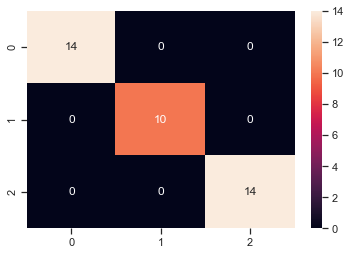

In [59]:
sns.heatmap(conf_mat, annot = True,fmt="d")